

# Project 2: Investigate a Dataset (Database_No_show_appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction
   > This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
>**‘ScheduledDay’**: tells us on what day the patient set up their appointment.
>
>**‘Neighborhood’**: indicates the location of the hospital.
>
>**‘Scholarship’**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>
>**'No-show'**: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
>


What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

To helps to figure out the answer, here are
   #### A. General look:
   > To look closely at each variable and how strong is the relation between them and not showing up.
   #### B. Trends to be explored:
   >
   >Number of appointments over the years.
   >
   >Number of patients who did not show up over the years.
   >
   >
   #### C. Associations and Effects to be evaluated:
   >Alcoholism vs Not showing.(is there a relation between not showing up on the appointment and having Alcoholism?)
   >
   >Age, Gender vs Alcoholism.(does Alcoholism is more common within certain gender or age?) 
   >
   >Weekdays vs Not showing.(does the rate of not showing up increases in certain days? )
   

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  checking for cleanliness, trimming and cleaning the dataset for analysis. 

### General Properties

In [2]:
df = pd.read_csv (r'C:\Users\Bushra\Downloads\noshowappointments-kagglev2-may-2016.csv')
# Checking the missing values
df.info()
# as it shows, no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
# checking the outliers 
df.describe()
#as it shows in the 'Age' column, the minimum value = -1 which is impossible  

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
#checking for duplicates
sum(df.duplicated())
#No duplicated values

0

>*observations:*
>
>>1- No missing values.
>>
>>2- Age column has wrong values.
>>
>>3- No duplicated rows.
>>
>>4- Misspelled columns labels.
>
>

### Data Cleaning

In [5]:
# Number of rows with unreasonable Age
print("Age less than 0 : ",
      sum(df.Age <= 0))

Age less than 0 :  3540


In [6]:
#those will be filled with the mean of Ages
MA = df['Age'].mean()
df.loc[df['Age'] <= 0, 'Age'] = MA
print("Age less than 0 : ",
      sum(df.Age <= 0))

Age less than 0 :  0


In [7]:
#dropping unnecessary columns
df.drop(['AppointmentDay','PatientId','AppointmentID'], axis=1, inplace = True)

In [8]:
# Rename misspelled columns
df.rename(columns = {'Hipertension' : 'Hypertension',
                     'Handcap' : 'Handicap',
                     'ScheduledDay' : 'Scheduled_Day',
                     'No-show' : 'No_Show'}, inplace = True)

In [9]:
# make sure the dates are in date time form
df['Scheduled_Day']= pd.to_datetime(df['Scheduled_Day'])

# creat new columns to convert those dates into days names
df['S_D']= df['Scheduled_Day'].dt.strftime('%A')

In [10]:
# Replace 'No, Yes' and 'M, F' with '0,1' 
df.loc[df['No_Show']== "No", 'No_Show'] = 0
df.loc[df['No_Show']== "Yes", 'No_Show'] = 1

df.loc[df['Gender']== "M", 'Gender'] = 0
df.loc[df['Gender']== "F", 'Gender'] = 1

# check 
df.head()

,Gender,Scheduled_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,S_D
0,1,2016-04-29 18:38:08+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,0,2016-04-29 16:08:27+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,1,2016-04-29 16:19:04+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,1,2016-04-29 17:29:31+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,1,2016-04-29 16:07:23+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


<a id='eda'></a>
## Exploratory Data Analysis

>Computing statistics and create visualizations with the goal of the research questions.

### A.General look at the related variables to Not showing up 

#### 1- Not showing depending on Neighbourhood

In [11]:
print(df.groupby(['Neighbourhood'])['No_Show'].mean())

Neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.230327
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
                         ...   
SÃO JOSÉ               0.216490
SÃO PEDRO              0.210376
TABUAZEIRO             0.182950
UNIVERSITÁRIO          0.210526
VILA RUBIM             0.165687
Name: No_Show, Length: 81, dtype: float64


In [84]:
## since Not all the Neighbourhoods are showing, I will sort the means and include the highest 5

df_Neighbourhoods = pd.DataFrame(df.groupby(['Neighbourhood'])['No_Show'].sum())
df_Neighbourhoods.reset_index(inplace=True)

print('Top 5 Neighbourhoods:')
print(df_Neighbourhoods.sort_values(by=['No_Show'], ascending=False).head())

Top 5 Neighbourhoods:
     Neighbourhood No_Show
38  JARDIM CAMBURI    1465
43     MARIA ORTIZ    1219
36         ITARARÉ     923
59     RESISTÊNCIA     906
10          CENTRO     703


As it shows, number of absent patients who live in 'JARDIM CAMBURI' is the highest. we need more detailed datast to assess reason behind that.

#### 2- Not showing depending on other variables

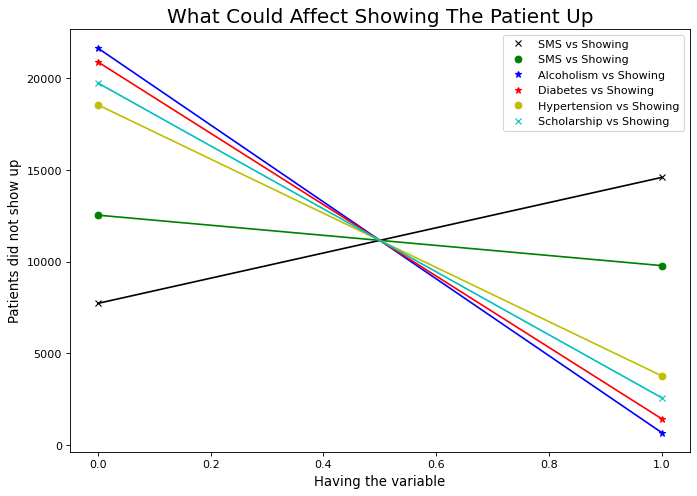

In [13]:
# defining arrays to avoid repetition
df_G = pd.DataFrame(df.groupby(['Gender'])['No_Show'].sum())
df_SMS = pd.DataFrame(df.groupby(['SMS_received'])['No_Show'].sum())
df_Alc = pd.DataFrame(df.groupby(['Alcoholism'])['No_Show'].sum())
df_Di = pd.DataFrame(df.groupby(['Diabetes'])['No_Show'].sum())
df_Hyp = pd.DataFrame(df.groupby(['Hypertension'])['No_Show'].sum())
df_Sc = pd.DataFrame(df.groupby(['Scholarship'])['No_Show'].sum())

plt.figure(figsize=(10,7), dpi=80)

plt.plot(df_G,'kx',label='SMS vs Showing')
plt.plot(df_G,'k') 
plt.plot(df_SMS,'go',label='SMS vs Showing')
plt.plot(df_SMS,'g')    
plt.plot(df_Alc,'b*',label='Alcoholism vs Showing')
plt.plot(df_Alc,'b')
plt.plot(df_Di,'r*',label='Diabetes vs Showing')
plt.plot(df_Di,'r')
plt.plot(df_Hyp,'yo',label='Hypertension vs Showing')
plt.plot(df_Hyp,'y')
plt.plot(df_Sc,'cx',label='Scholarship vs Showing')
plt.plot(df_Sc,'c')

plt.title('What Could Affect Showing The Patient Up', fontsize=18)
plt.xlabel('Having the variable', fontsize=12)
plt.ylabel('Patients did not show up', fontsize=12)
plt.legend(loc='best')
plt.show()

As we can see:

1- Females are more likely to not show up. However the relation between Gender
 type and showing up is not that strong.

2- Suprisingly, receiving SMS does not affect showing the patient.

3- Patients who do not have the other variables are more likely to not show up
so recording them will not be that helpful.

### B.Trends to be explored:
####  Number of appointments and abcenses over the years.

C:\Users\Bushra\AppData\Local\Temp/ipykernel_13760/2142985647.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ap = pd.DataFrame(df.groupby(df.Scheduled_Day.dt.date)['counter','No_Show'].apply(sum))


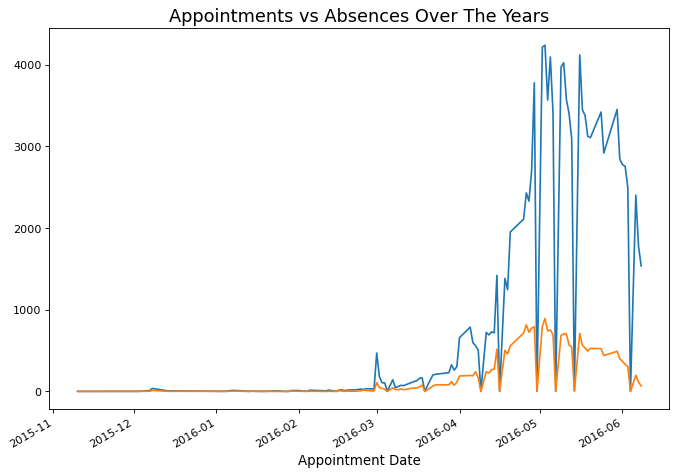

In [14]:
df['counter']=1 # To creat time series graph
df_ap = pd.DataFrame(df.groupby(df.Scheduled_Day.dt.date)['counter','No_Show'].apply(sum))
df_ap.rename(columns = {'counter':'Appointments'}, inplace = True)
df_ap.reset_index(inplace=True) #to set the columns labels at the same level

df_ap = df_ap.set_index(df_ap['Scheduled_Day']) #to set the dates as x-axis

plt.figure(figsize=(10,7), dpi=80)
plt.plot(df_ap['Appointments'],label = 'Appointments')
plt.plot(df_ap['No_Show'],label = 'Absences')
plt.gcf().autofmt_xdate()
plt.xlabel('Appointment Date',fontsize=12)
plt.title('Appointments vs Absences Over The Years',fontsize=16)
plt.show()

as the number of appointments increases, the number of absences is also increases but with lower rate.

### C. Associations and Effects to be evaluated:
#### 1.Age, Gender vs Alcoholism.

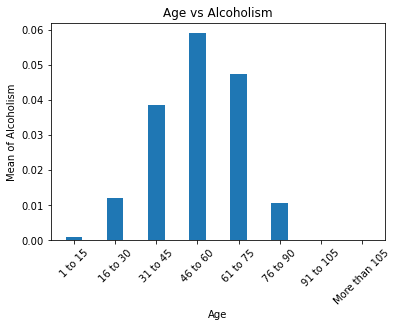

In [15]:
#Age vs Alcoholism
df_E_1 = pd.DataFrame(df.groupby(pd.cut(df['Age'],
                      bins=[0,15,30,45,60,75,90,105,np.inf]))['Alcoholism'].mean())
df_E_1.reset_index(inplace=True)
df_E_1['intervals'] = ['1 to 15','16 to 30','31 to 45',
                       '46 to 60','61 to 75','76 to 90',
                       '91 to 105','More than 105']
plt.xticks(rotation=45)
plt.bar(df_E_1['intervals'], df_E_1['Alcoholism'],width = 0.4)
plt.xlabel('Age')
plt.ylabel('Mean of Alcoholism')
plt.title('Age vs Alcoholism')
plt.show()

As we can see Alcoholism has normal distribution. it is common within patients between 46 and 60, Also the male patients has higher Alcoholism rate

In [70]:
#Gender vs Alcoholism
df_E_2 = pd.DataFrame(df.groupby(['Gender','No_Show'])['Alcoholism'].sum())
df_E_2.reset_index(inplace=True)
df_E_2.head()


,Gender,No_Show,Alcoholism
0,0,0,1768
1,0,1,369
2,1,0,915
3,1,1,308


C:\Users\Bushra\AppData\Local\Temp/ipykernel_13760/2692305041.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels  = labels, loc='best')


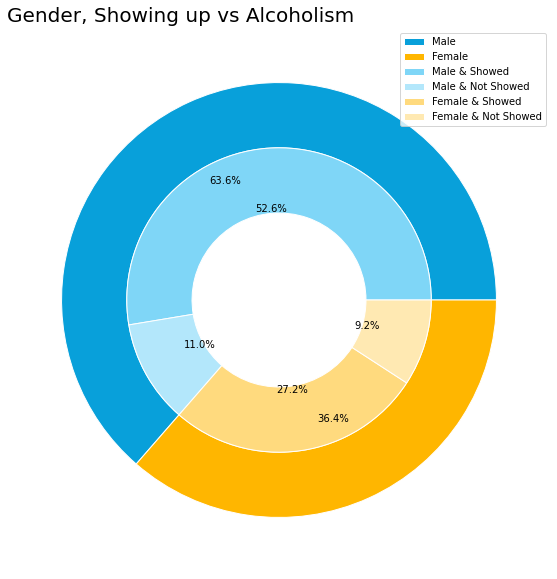

In [78]:
#Alcoholism vs Not showing
df_E_3 = pd.DataFrame(df.groupby(['Gender'])['Alcoholism'].sum())
df_E_3.reset_index(inplace=True)

# Graph
fig, ax = plt.subplots(figsize=(10,10))
labels  = ['Male', 'Female', 'Male & Showed', 'Male & Not Showed','Female & Showed', 'Female & Not Showed']

ax.pie(df_E_3['Alcoholism'], 
       radius=1,
       colors=['#08a0da','#ffb600'],
       autopct='%1.1f%%',
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.pie(df_E_2['Alcoholism'], 
       radius=0.7, 
       colors=['#7fd6f7','#b3e7fb','#ffda7e','#ffe9b2'], 
       autopct='%1.1f%%',
       wedgeprops=dict(width=0.3, edgecolor='w'))


patches, texts, auto = ax1.pie(df_E_2['Alcoholism'],
                    colors=['#7fd6f7','#b3e7fb','#ffda7e','#ffe9b2'],
                    shadow=True, startangle=90, autopct='%1.1f%%' )
plt.legend(patches, labels  = labels, loc='best')
plt.title('Gender, Showing up vs Alcoholism',loc="left",fontsize = 20)
plt.show()

 As we can see:

 1- Patients with age between 46 to 60 are more likely to have Alcoholism.

 2- Male patients are more likely to have Alcoholism.

#### 3.Weekdays vs Not showing.

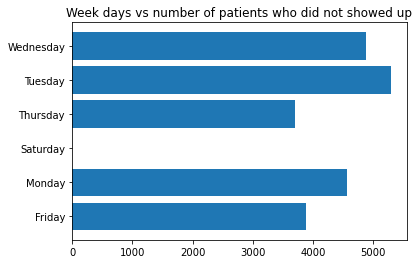

In [82]:
#data frame for the week days
df_E_4 = pd.DataFrame(df.groupby(['S_D'])['No_Show'].sum())
df_E_4.reset_index(inplace=True)

#Graph
plt.barh(df_E_4['S_D'],df_E_4['No_Show'])
plt.title('Week days vs number of patients who did not showed up')
plt.show()

As it shows, number of absences in Tuesday is the highest,Monday and ednesday are close
since they're working days in Brazil. Saturday (which considered weekend) is the lowest with a clear difference.

<a id='conclusions'></a>
## Conclusions
>**Results:**
>
> • As we can see, the number of appointments is increasing through the years, as well as the number of absents which has been expressed in the graphs.
>
> • there is no significant relations between not showing up on the appointment and the following variables: 
>
> Gender, Diabetes, Alcoholism, SMS_received and Hypertension.
>
>
> • However, there is a relation between showing up and other variables
>
>> -Neighbourhoods: as it shows 'ILHAS OCEÂNICAS DE TRINDADE' has the highest rate.
>>
>> -Scholarship: patients with a scholarship have higher rate.
>>
>> -Appointment day: Tuesday, Wednesday and Thursday have higher rates.
>
> • looking deep into Alcoholism and trying to figure out if it common within certain range of age or gender
>
> • As we can see Alcoholism is common within patients between 46 and 60, Also the male patients has higher Alcoholism rate. 
>
>
>
>**Limitations:**
>
>  • Number of neighberhoods was big, it was hard to anlyze the relation between the patient's neigbrheed and attendence status, moreover the relation will not be clear since the hospitals neighbrhoods are not included (to see if the long distance is the reason or living in a certain neighebrhood will increase the probabilty of attending.
>
>  • result of the relation between receiving SMS message and attending is not reasonable, but if tha data set was more detailed like the patient's phone number (to check if the numbers were entered correctly) this will be helpful.
> 